In [1]:
# importing glob for getting all *.csv files in data folder
import glob

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
def find_paths_for_data():
    woj_list = []
    for files in glob.glob("data/*.csv"):
        # splitter = "data\\"
        base = f'data'+'/'
        splited_files = base + files.split("data\\")[1]
        woj_list.append(splited_files)
    return woj_list
paths_for_data = find_paths_for_data()

In [3]:
def load_data(paths_list):
    # wczytanie pierwszej ścieżki z listy
    # data = pd.read_csv(paths_list[0],index_col=0)
    # print(paths_list[1:])
    frames = []
    for path in paths_list:
        data_current = pd.read_csv(path, index_col=0)
        frames.append(data_current)
        # data = pd.concat(data, data_current, ignore_index=True)
        # print(data)
    data = pd.concat(frames).reset_index(drop=True)

    # add new column moc-do-masy
    data['moc-do-masy'] = data['moc-netto-silnika'] / data['masa-wlasna']
    return data

In [4]:
paths_for_data = find_paths_for_data()

In [5]:
data = load_data(paths_for_data)

c:\users\51727\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\users\51727\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (7,16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [6]:
data

,marka,model,rodzaj-pojazdu,podrodzaj-pojazdu,pochodzenie-pojazdu,sposob-produkcji,rok-produkcji,data-pierwszej-rejestracji-w-kraju,data-ostatniej-rejestracji-w-kraju,data-rejestracji-za-granica,pojemnosc-skokowa-silnika,moc-netto-silnika,masa-wlasna,liczba-miejsc-ogolem,rodzaj-paliwa,kierownica-po-prawej-stronie,rejestracja-wojewodztwo,moc-do-masy
0,CITROEN,C5,SAMOCHÓD OSOBOWY,KARETA (SEDAN),UŻYW. IMPORT INDYW,2009,FABRYCZNY,2019-01-02,2019-10-22,2009-06-09,1997.0,100.0,1733.0,5.0,OLEJ NAPĘDOWY,NaN,DOLNOŚLĄSKIE,0.057703
1,SEAT,LEON,SAMOCHÓD OSOBOWY,WIELOZADANIOWY,UŻYW. IMPORT INDYW,2006,FABRYCZNY,2019-01-02,2019-10-22,2006-04-25,1896.0,77.0,1290.0,5.0,OLEJ NAPĘDOWY,NaN,DOLNOŚLĄSKIE,0.059690
2,OPEL,VECTRA,SAMOCHÓD OSOBOWY,KARETA (SEDAN),UŻYW. IMPORT INDYW,2007,FABRYCZNY,2019-01-02,2019-07-22,2007-11-19,1796.0,103.0,1395.0,5.0,BENZYNA,NaN,DOLNOŚLĄSKIE,0.073835
3,SKODA,KAROQ,SAMOCHÓD OSOBOWY,KOMBI,NOWY ZAKUPIONY W KRAJU,2018,FABRYCZNY,2019-01-02,2019-01-02,NaN,999.0,85.0,1292.0,5.0,BENZYNA,NaN,DOLNOŚLĄSKIE,0.065789
4,SKODA,FABIA,SAMOCHÓD OSOBOWY,KOMBI,NOWY ZAKUPIONY W KRAJU,2018,FABRYCZNY,2019-01-02,2019-01-02,NaN,999.0,81.0,1144.0,5.0,BENZYNA,NaN,DOLNOŚLĄSKIE,0.070804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595540,VOLKSWAGEN,POLO,SAMOCHÓD OSOBOWY,HATCHBACK,UŻYW. IMPORT INDYW,FABRYCZNY,2002,2019-06-28,2019-06-28,2003-01-14,1390.0,55.0,1093.0,5.0,BENZYNA,NaN,ŚWIĘTOKRZYSKIE,0.050320
595541,VOLKSWAGEN,GOLF,SAMOCHÓD OSOBOWY,HATCHBACK,UŻYW. IMPORT INDYW,FABRYCZNY,2000,2019-06-28,2019-06-28,2001-03-12,1596.0,77.0,1310.0,5.0,BENZYNA,NaN,ŚWIĘTOKRZYSKIE,0.058779
595542,FORD,KUGA,SAMOCHÓD OSOBOWY,WIELOZADANIOWY,NOWY ZAKUPIONY W KRAJU,FABRYCZNY,2019,2019-06-28,2019-06-28,NaN,1498.0,110.0,1540.0,5.0,BENZYNA,NaN,ŚWIĘTOKRZYSKIE,0.071429
595543,VOLKSWAGEN,TRANSPORTER,SAMOCHÓD OSOBOWY,VAN,UŻYW. IMPORT INDYW,FABRYCZNY,2005,2019-06-28,2019-06-28,2005-04-19,1896.0,77.0,1865.0,9.0,OLEJ NAPĘDOWY,NaN,ŚWIĘTOKRZYSKIE,0.041287


In [7]:
len(data)

595545

In [8]:

data.groupby('rok-produkcji').count()

,marka,model,rodzaj-pojazdu,podrodzaj-pojazdu,pochodzenie-pojazdu,sposob-produkcji,data-pierwszej-rejestracji-w-kraju,data-ostatniej-rejestracji-w-kraju,data-rejestracji-za-granica,pojemnosc-skokowa-silnika,moc-netto-silnika,masa-wlasna,liczba-miejsc-ogolem,rodzaj-paliwa,kierownica-po-prawej-stronie,rejestracja-wojewodztwo,moc-do-masy
rok-produkcji,,,,,,,,,,,,,,,,,
1979,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1990,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
2001,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3
2002,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2
2003,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,108300,108302,108309,108309,108309,108309,108309,108309,4097,107698,108259,108309,108289,108297,127,108309,108259
2019,121471,121476,121477,121477,121477,121477,121477,121477,86,121319,121442,121477,121443,121452,101,121477,121442
FABRYCZNY,11222,11052,11225,11225,11225,11225,11225,11225,7667,11195,11221,11225,11220,11224,10,11225,11221


In [9]:
data

,marka,model,rodzaj-pojazdu,podrodzaj-pojazdu,pochodzenie-pojazdu,sposob-produkcji,rok-produkcji,data-pierwszej-rejestracji-w-kraju,data-ostatniej-rejestracji-w-kraju,data-rejestracji-za-granica,pojemnosc-skokowa-silnika,moc-netto-silnika,masa-wlasna,liczba-miejsc-ogolem,rodzaj-paliwa,kierownica-po-prawej-stronie,rejestracja-wojewodztwo,moc-do-masy
0,CITROEN,C5,SAMOCHÓD OSOBOWY,KARETA (SEDAN),UŻYW. IMPORT INDYW,2009,FABRYCZNY,2019-01-02,2019-10-22,2009-06-09,1997.0,100.0,1733.0,5.0,OLEJ NAPĘDOWY,NaN,DOLNOŚLĄSKIE,0.057703
1,SEAT,LEON,SAMOCHÓD OSOBOWY,WIELOZADANIOWY,UŻYW. IMPORT INDYW,2006,FABRYCZNY,2019-01-02,2019-10-22,2006-04-25,1896.0,77.0,1290.0,5.0,OLEJ NAPĘDOWY,NaN,DOLNOŚLĄSKIE,0.059690
2,OPEL,VECTRA,SAMOCHÓD OSOBOWY,KARETA (SEDAN),UŻYW. IMPORT INDYW,2007,FABRYCZNY,2019-01-02,2019-07-22,2007-11-19,1796.0,103.0,1395.0,5.0,BENZYNA,NaN,DOLNOŚLĄSKIE,0.073835
3,SKODA,KAROQ,SAMOCHÓD OSOBOWY,KOMBI,NOWY ZAKUPIONY W KRAJU,2018,FABRYCZNY,2019-01-02,2019-01-02,NaN,999.0,85.0,1292.0,5.0,BENZYNA,NaN,DOLNOŚLĄSKIE,0.065789
4,SKODA,FABIA,SAMOCHÓD OSOBOWY,KOMBI,NOWY ZAKUPIONY W KRAJU,2018,FABRYCZNY,2019-01-02,2019-01-02,NaN,999.0,81.0,1144.0,5.0,BENZYNA,NaN,DOLNOŚLĄSKIE,0.070804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595540,VOLKSWAGEN,POLO,SAMOCHÓD OSOBOWY,HATCHBACK,UŻYW. IMPORT INDYW,FABRYCZNY,2002,2019-06-28,2019-06-28,2003-01-14,1390.0,55.0,1093.0,5.0,BENZYNA,NaN,ŚWIĘTOKRZYSKIE,0.050320
595541,VOLKSWAGEN,GOLF,SAMOCHÓD OSOBOWY,HATCHBACK,UŻYW. IMPORT INDYW,FABRYCZNY,2000,2019-06-28,2019-06-28,2001-03-12,1596.0,77.0,1310.0,5.0,BENZYNA,NaN,ŚWIĘTOKRZYSKIE,0.058779
595542,FORD,KUGA,SAMOCHÓD OSOBOWY,WIELOZADANIOWY,NOWY ZAKUPIONY W KRAJU,FABRYCZNY,2019,2019-06-28,2019-06-28,NaN,1498.0,110.0,1540.0,5.0,BENZYNA,NaN,ŚWIĘTOKRZYSKIE,0.071429
595543,VOLKSWAGEN,TRANSPORTER,SAMOCHÓD OSOBOWY,VAN,UŻYW. IMPORT INDYW,FABRYCZNY,2005,2019-06-28,2019-06-28,2005-04-19,1896.0,77.0,1865.0,9.0,OLEJ NAPĘDOWY,NaN,ŚWIĘTOKRZYSKIE,0.041287


In [10]:
data['rok-produkcji_clear'] = [x[1] if x[0]=='FABRYCZNY' or x[0]=='PRODUKCJA JEDNOSTKOWA' or x[0] == "ZABYTKOWY"   else x[0] for x in zip(data['rok-produkcji'],data['sposob-produkcji'])]
data['sposob-produkcji_clear'] = [x[1] if x[1]=='FABRYCZNY' or x[1]=='PRODUKCJA JEDNOSTKOWA' or x[1] == "ZABYTKOWY" else x[0] for x in zip(data['rok-produkcji'],data['sposob-produkcji'])]
data['rok-produkcji'] = data['rok-produkcji_clear']
data['sposob-produkcji'] = data['sposob-produkcji_clear']
del data['sposob-produkcji_clear']
del data['rok-produkcji_clear']

In [11]:
data['sposob-produkcji']

0         FABRYCZNY
1         FABRYCZNY
2         FABRYCZNY
3         FABRYCZNY
4         FABRYCZNY
            ...    
595540    FABRYCZNY
595541    FABRYCZNY
595542    FABRYCZNY
595543    FABRYCZNY
595544    FABRYCZNY
Name: sposob-produkcji, Length: 595545, dtype: object

In [12]:
data.shape

(595545, 18)

In [13]:
# Only one value is nan so we drop that 
data =  data[data['rok-produkcji'].notnull()]
data.shape

(595544, 18)

In [14]:
data['rok-produkcji'] = data['rok-produkcji'].astype('int32')

c:\users\51727\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
# dane mamy dla 2019 dlatego też będziemy z tego roku będziemy korzystać do obliczenia wieku auta
data['wiek_auta'] = int(2019) - data['rok-produkcji']

c:\users\51727\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
data.groupby('sposob-produkcji').count()
# Zostało jeszcze kilka wartości nieporządanych - zostaną usunięte

,marka,model,rodzaj-pojazdu,podrodzaj-pojazdu,pochodzenie-pojazdu,rok-produkcji,data-pierwszej-rejestracji-w-kraju,data-ostatniej-rejestracji-w-kraju,data-rejestracji-za-granica,pojemnosc-skokowa-silnika,moc-netto-silnika,masa-wlasna,liczba-miejsc-ogolem,rodzaj-paliwa,kierownica-po-prawej-stronie,rejestracja-wojewodztwo,moc-do-masy,wiek_auta
sposob-produkcji,,,,,,,,,,,,,,,,,,
1979,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2003,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
2008,1,0,1,1,0,1,1,1,1,1,0,0,0,1,0,1,0,1
2010,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
FABRYCZNY,594613,593183,594644,594644,594644,594644,594644,594644,363667,593680,594517,594644,593862,594604,415,594644,594517,594644
PRODUKCJA JEDNOSTKOWA,239,241,241,241,241,241,241,241,139,241,241,241,236,240,0,241,241,241
ZABYTKOWY,653,653,655,655,655,655,655,655,569,655,653,655,651,655,0,655,653,655


In [17]:
types = ['FABRYCZNY', 'PRODUKCJA JEDNOSTKOWA', 'ZABYTKOWY']
data = data[data['sposob-produkcji'].isin(types)]

In [18]:
data.groupby('sposob-produkcji').count()

,marka,model,rodzaj-pojazdu,podrodzaj-pojazdu,pochodzenie-pojazdu,rok-produkcji,data-pierwszej-rejestracji-w-kraju,data-ostatniej-rejestracji-w-kraju,data-rejestracji-za-granica,pojemnosc-skokowa-silnika,moc-netto-silnika,masa-wlasna,liczba-miejsc-ogolem,rodzaj-paliwa,kierownica-po-prawej-stronie,rejestracja-wojewodztwo,moc-do-masy,wiek_auta
sposob-produkcji,,,,,,,,,,,,,,,,,,
FABRYCZNY,594613,593183,594644,594644,594644,594644,594644,594644,363667,593680,594517,594644,593862,594604,415,594644,594517,594644
PRODUKCJA JEDNOSTKOWA,239,241,241,241,241,241,241,241,139,241,241,241,236,240,0,241,241,241
ZABYTKOWY,653,653,655,655,655,655,655,655,569,655,653,655,651,655,0,655,653,655


In [19]:
data['rok-produkcji'].unique()

array([2009, 2006, 2007, 2018, 2003, 2008, 2015, 2012, 2011, 2010, 2013,
       2004, 2001, 1997, 2002, 2005, 1998, 1999, 1995, 2014, 2016, 2017,
       2000, 1996, 1985, 1967, 1990, 1991, 1989, 1993, 1977, 2019, 1992,
       1969, 1994, 1986, 1976, 1972, 1982, 1987, 1988, 1975, 1978, 1958,
       1938, 1979, 1984, 1974, 1934, 1980, 1965, 1983, 1952, 1971, 1937,
       1966, 1962, 1973, 1959, 1970, 1981, 1963, 1960, 1968, 1931, 1942,
       1935, 1954, 1955, 1953, 1956, 1927, 1918, 1940, 1964, 1926, 1957,
       1944, 1961, 1928, 1948, 1936, 1951, 1932, 1950, 1939, 1910, 1943,
       1941, 1915])

In [20]:
data.groupby('sposob-produkcji').count()

,marka,model,rodzaj-pojazdu,podrodzaj-pojazdu,pochodzenie-pojazdu,rok-produkcji,data-pierwszej-rejestracji-w-kraju,data-ostatniej-rejestracji-w-kraju,data-rejestracji-za-granica,pojemnosc-skokowa-silnika,moc-netto-silnika,masa-wlasna,liczba-miejsc-ogolem,rodzaj-paliwa,kierownica-po-prawej-stronie,rejestracja-wojewodztwo,moc-do-masy,wiek_auta
sposob-produkcji,,,,,,,,,,,,,,,,,,
FABRYCZNY,594613,593183,594644,594644,594644,594644,594644,594644,363667,593680,594517,594644,593862,594604,415,594644,594517,594644
PRODUKCJA JEDNOSTKOWA,239,241,241,241,241,241,241,241,139,241,241,241,236,240,0,241,241,241
ZABYTKOWY,653,653,655,655,655,655,655,655,569,655,653,655,651,655,0,655,653,655


In [21]:
data.subscribe()

AttributeError: 'DataFrame' object has no attribute 'subscribe'

In [ ]:
data['moc-netto-silnika'].median()

In [50]:
data['moc-netto-silnika'].mean()

97.74085766268486

In [30]:
data['moc-netto-silnika'].boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

W celu przeprowadzenia analiz ograniczyliśmy moc-netto-silnika do 2200, ponieważ taki jest najmocniejszy samochód na świecie(RedVictor I)


In [41]:
data_proceessed = data[data['moc-netto-silnika'] < 1200]

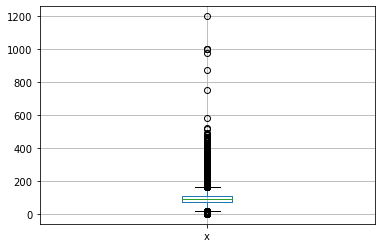

In [42]:
pd.DataFrame.boxplot(data_proceessed['moc-netto-silnika'])

In [43]:
data_proceessed = data[data['moc-netto-silnika'] < 500]

In [44]:
# dla lepszego zobrazowamoa wykresu histogramu ogarniczyliśmy zbiór do 500

In [64]:
plt.hist(x="moc-netto-silnika", data=data_proceessed, bins=20)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

NameError: name 'data_proceessed' is not defined

In [ ]:
# Z wykresu jesteśmy w stanie dowiedzieć się że moc silnika netto silnie 

In [17]:
!pip install -U seaborn

Wnioski z przedstawionej przykładowej analizy

 a) przynajmniej 2 "case" danych pobranych z cepik, czyli do czego to można wykorzystać - co w ogóle daje ta wizualizacja i jakie wiadomości można z niej uzyskać. 
 
Przykłady wykorzystania danych pobranych z cepik:
    - Stworzona przez nas aplikacja (dash) pozwala zaznajomić się użytkownikowi z danymi na temat rejestrowanych aut
    - Pozwala określić jak zmienia się przekrój sprowadzanych aut z zagranicy w ciągu miesiecy (wystarczy pobrać więcej danych, aby umożliwić roczne porównania)
    - Pozwala monitorować trendy 
    - Wyznaczenie zainteresowania konkretnymi markami
    - Pozwala określić między innymi czy zainteresowanie daną marką rośnie czy maleje
    - Wyznaczenie mody (jakie auta są najcześciej sprowadzane)
    - Wyznaczenie jakie auta są najczęściej kupowane nowe
    - Odpowiedź na pytanie w jakich miesiącach samochody są częściej sprowadzane
    - Może pomóc w portalom motoryzacyjnym
    - Pozwolić zbadać jak Pandemia Koronawirusa wpłynęła na rynek motoryzacyjny (Oczywiście kiedy spłyną dane z roku 2020)
    - Łącząc to z jakąś bazą danych odnośnie cen moglibyśmy sprawdzać wyznaczać wartości cen 
    
    

 

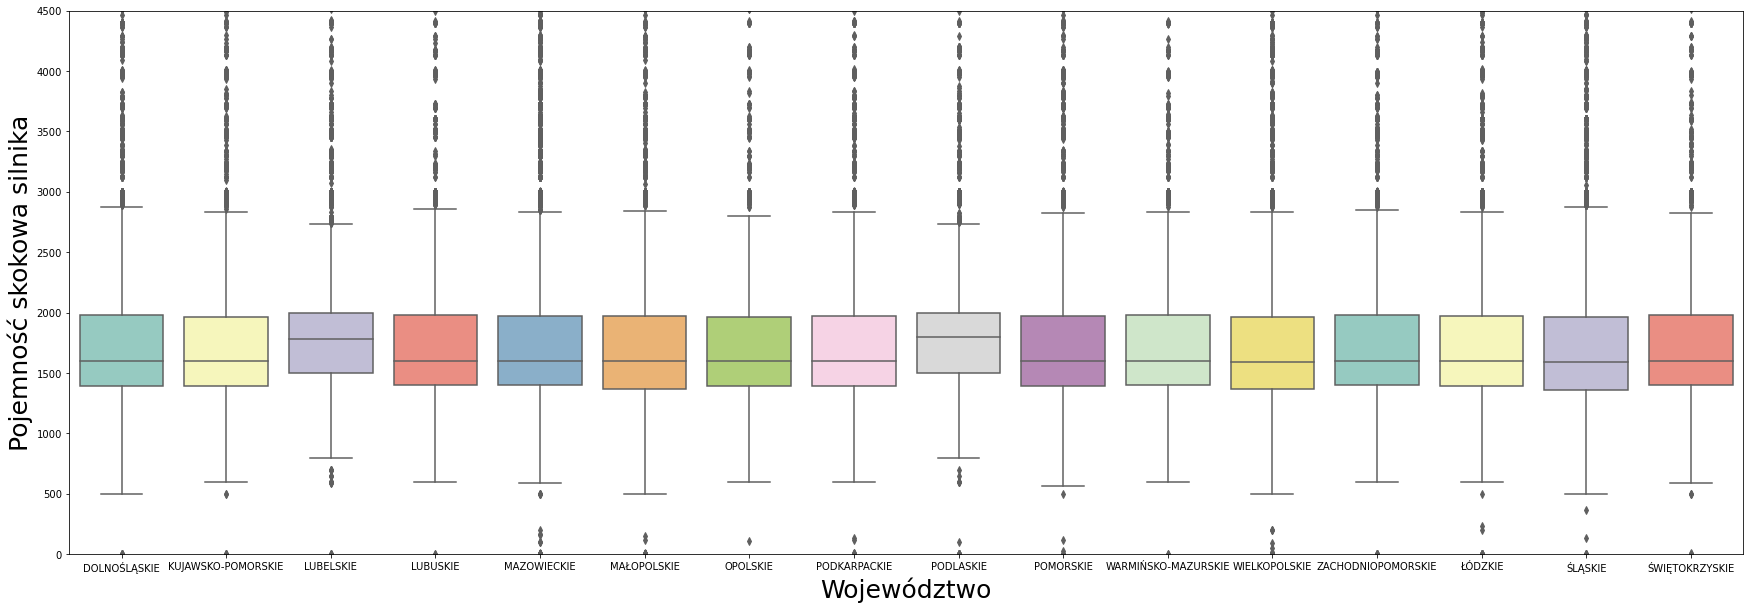

In [306]:
f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(x=data['rejestracja-wojewodztwo'], y="pojemnosc-skokowa-silnika", data=data, palette="Set3")
fig.set_xlabel("Województwo",fontsize=25)
fig.set_ylabel("Pojemność skokowa silnika",fontsize=25)
fig.tick_params(labelsize=10)
fig.axis(ymin=0, ymax=4500);

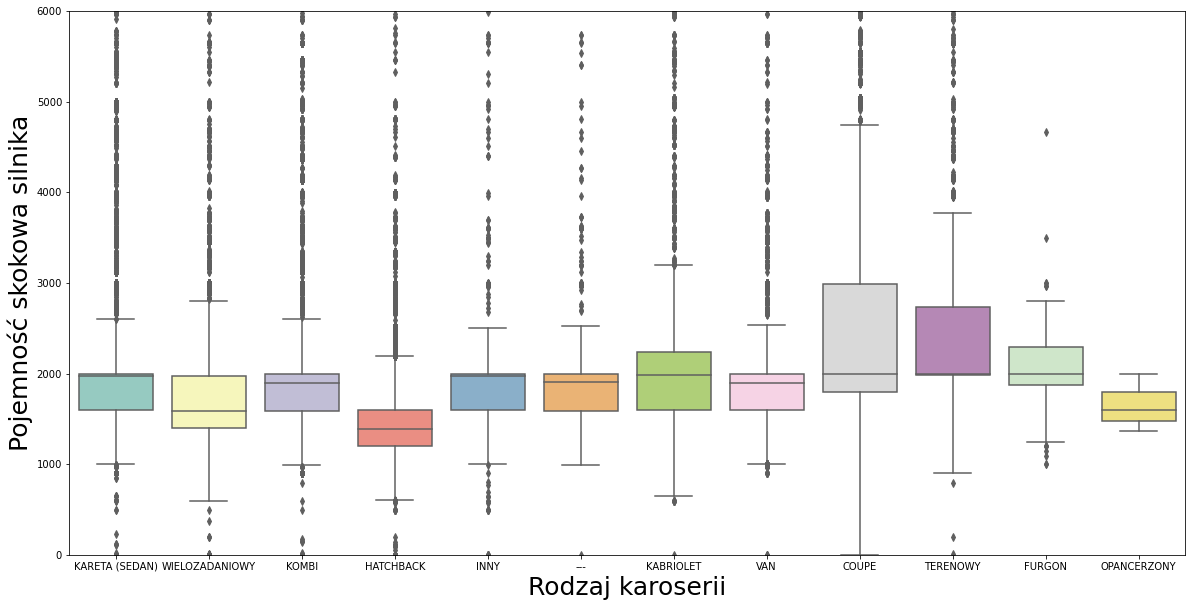

In [337]:
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=data['podrodzaj-pojazdu'], y="pojemnosc-skokowa-silnika", data=data, palette="Set3")
fig.set_xlabel("Rodzaj karoserii",fontsize=25)
fig.set_ylabel("Pojemność skokowa silnika",fontsize=25)
fig.axis(ymin=0, ymax=6000);

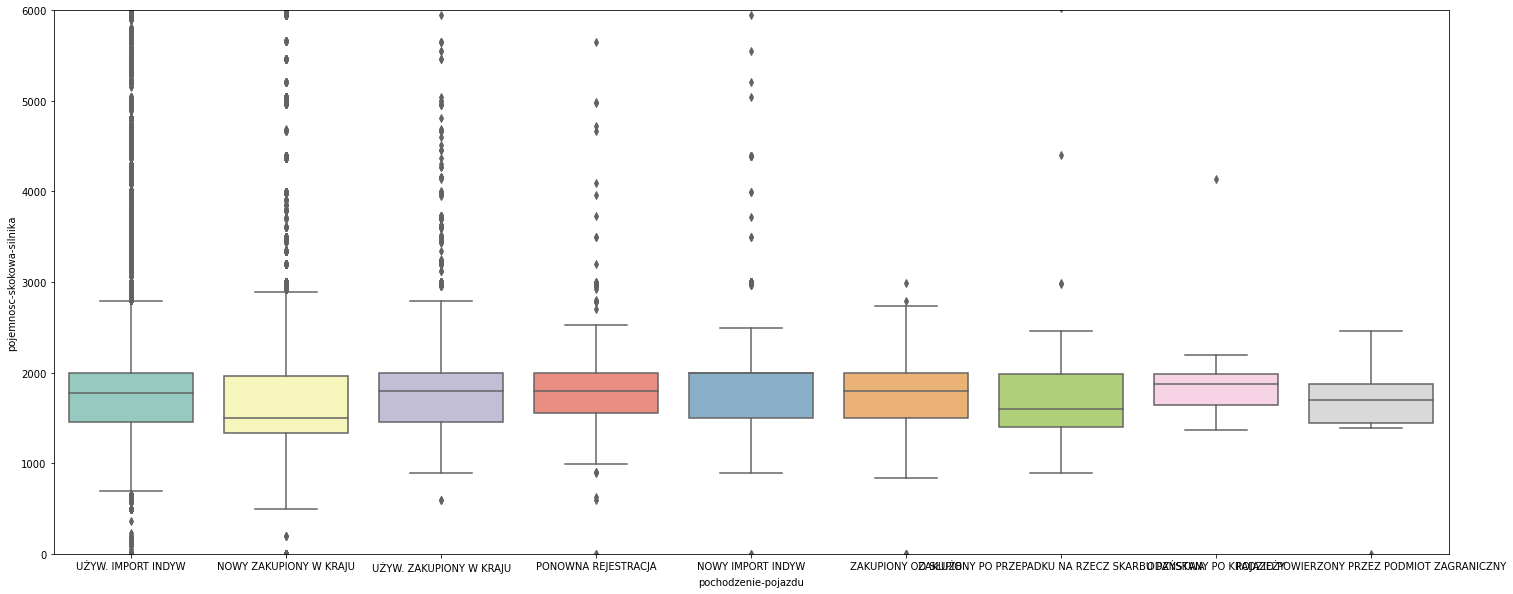

In [254]:
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x=data['pochodzenie-pojazdu'], y="pojemnosc-skokowa-silnika", data=data, palette="Set3")

fig.set_xlabel("Marka",fontsize=25)
fig.set_ylabel("Liczba rejestracji",fontsize=25)
fig.tick_params(labelsize=14)

fig.axis(ymin=0, ymax=6000);

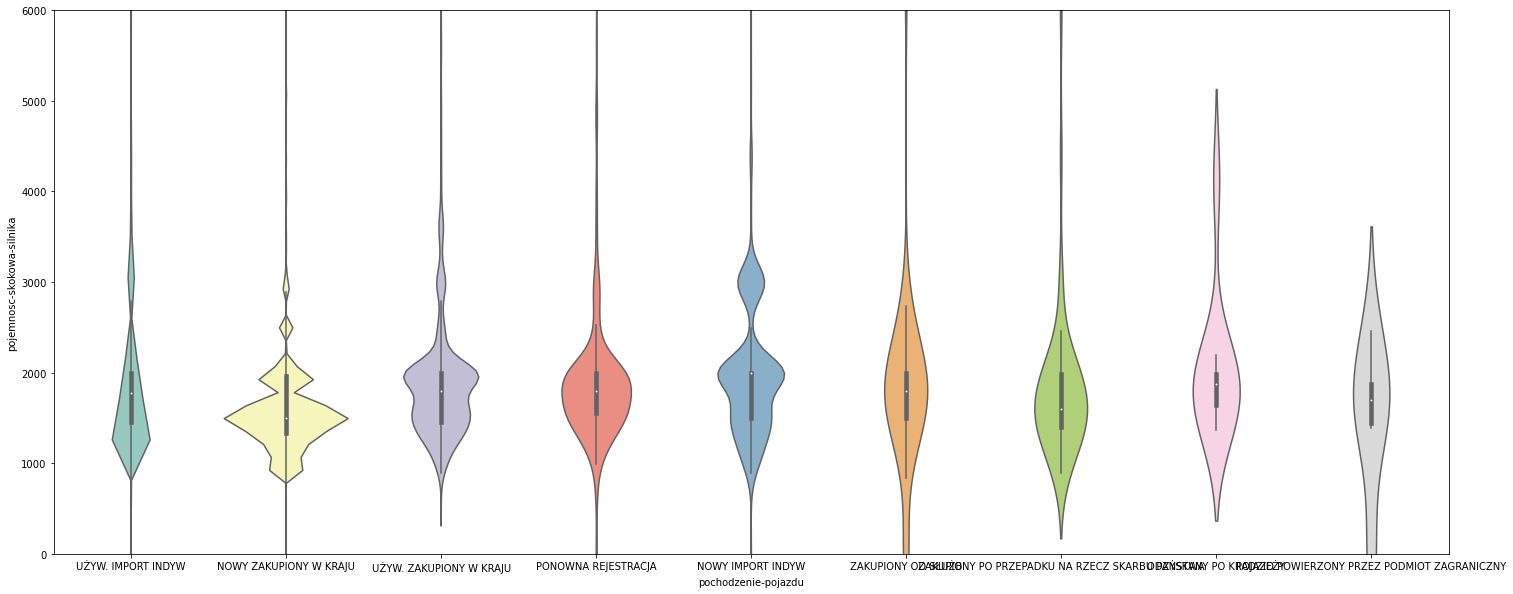

In [308]:
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.violinplot(x=data['pochodzenie-pojazdu'], y="pojemnosc-skokowa-silnika", data=data, palette="Set3")

fig.axis(ymin=0, ymax=6000);

AttributeError: 'AxesSubplot' object has no attribute 'get_xdata'

array([0, 0])

In [257]:
df_marka = data.groupby('marka').count()

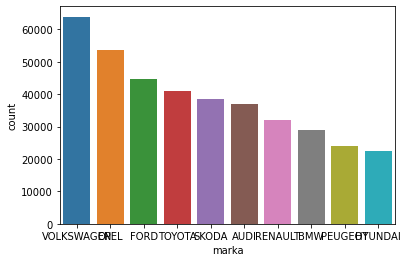

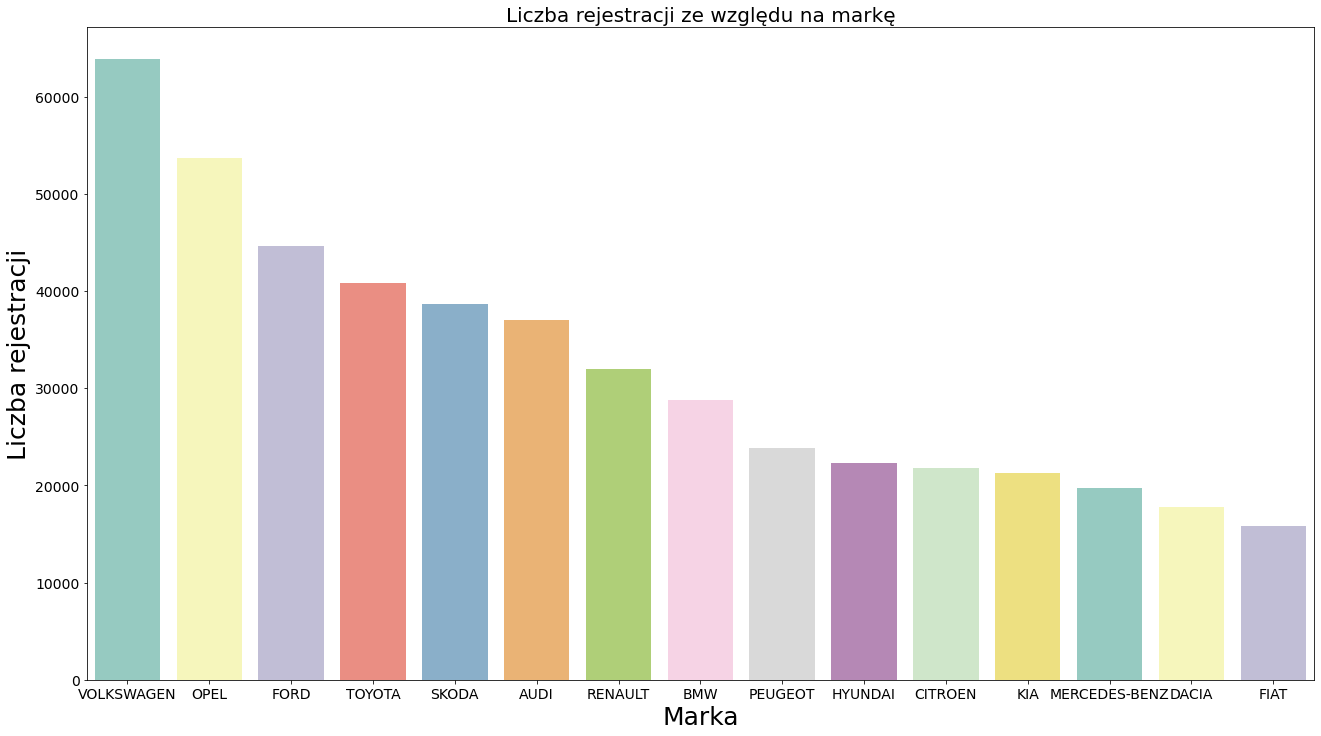

In [286]:
f, ax = plt.subplots(figsize=(22, 12))
fig = sns.countplot(x='marka',data=data,order=data.marka.value_counts().iloc[:15].index, palette="Set3")
fig.axes.set_title("Liczba rejestracji ze względu na markę",fontsize=20)
fig.set_xlabel("Marka",fontsize=25)
fig.set_ylabel("Liczba rejestracji",fontsize=25)
fig.tick_params(labelsize=14)
fig.axis();

In [325]:
data['masa-wlasna'].mean()

1403.786415689962

In [326]:
len(data['kierownica-po-prawej-stronie'].unique())

2

In [327]:
data['kierownica-po-prawej-stronie'].unique()

array([nan, False], dtype=object)

In [330]:
data.groupby('kierownica-po-prawej-stronie').count()

,marka,model,rodzaj-pojazdu,podrodzaj-pojazdu,pochodzenie-pojazdu,sposob-produkcji,rok-produkcji,data-pierwszej-rejestracji-w-kraju,data-ostatniej-rejestracji-w-kraju,data-rejestracji-za-granica,pojemnosc-skokowa-silnika,moc-netto-silnika,masa-wlasna,liczba-miejsc-ogolem,rodzaj-paliwa,rejestracja-wojewodztwo,moc-do-masy,wiek_auta
kierownica-po-prawej-stronie,,,,,,,,,,,,,,,,,,
False,415,415,415,415,415,415,415,415,415,185,415,415,415,415,415,415,415,415


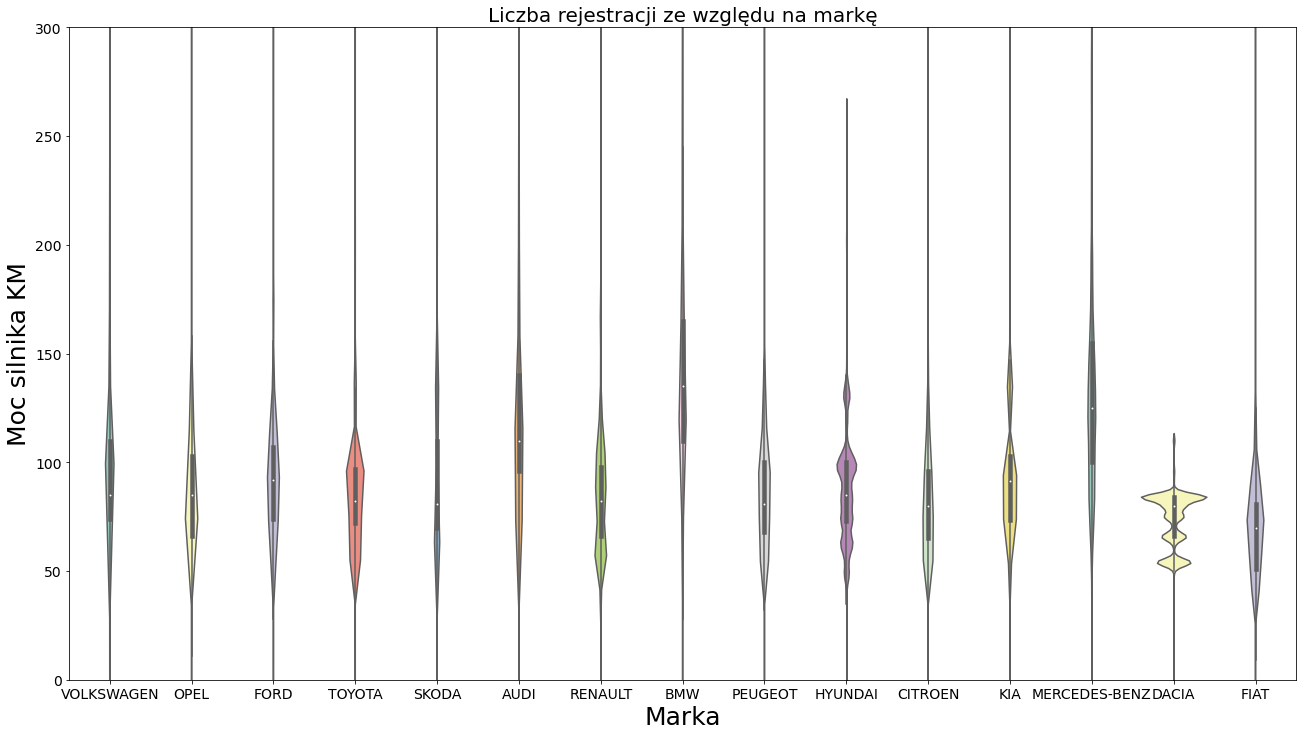

In [23]:
f, ax = plt.subplots(figsize=(22, 12))
fig = sns.violinplot(x=data['marka'], y="moc-netto-silnika", data=data, 
                     order=data.marka.value_counts().iloc[:15].index, palette="Set3")
fig.axes.set_title("Liczba rejestracji ze względu na markę",fontsize=20)
fig.set_xlabel("Marka",fontsize=25)
fig.set_ylabel("Moc silnika KM",fontsize=25)
fig.tick_params(labelsize=14)
fig.axis(ymin=0, ymax=300);

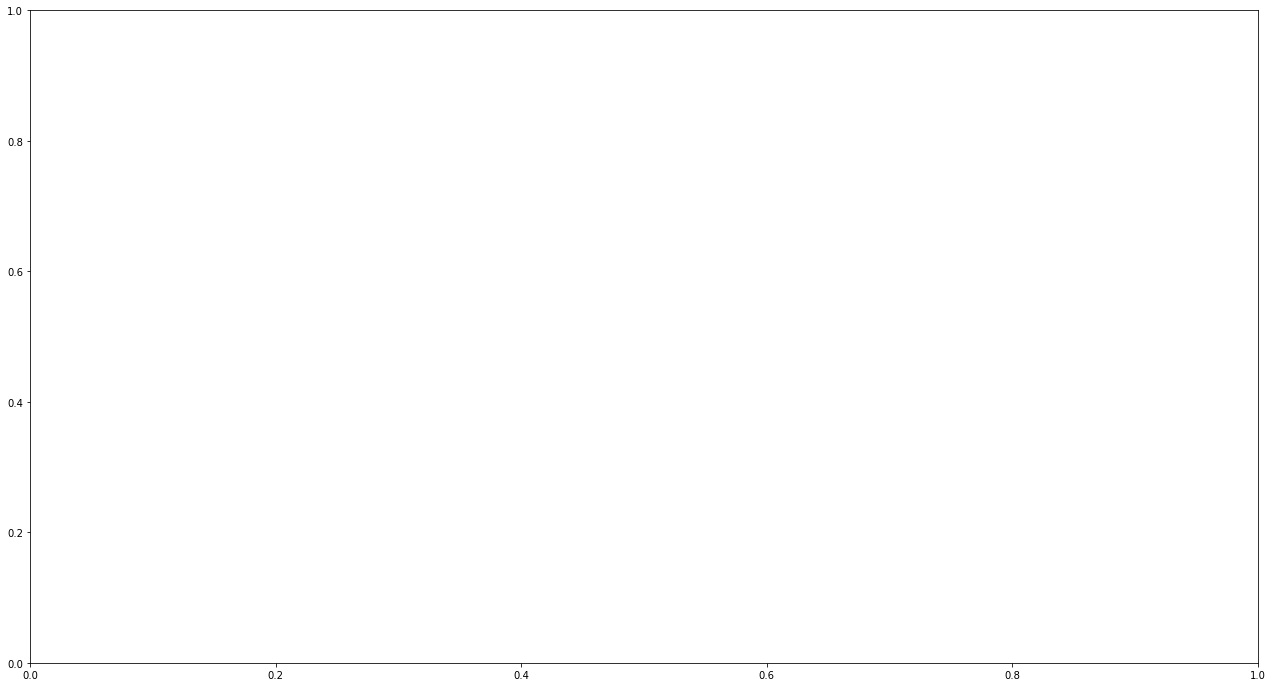

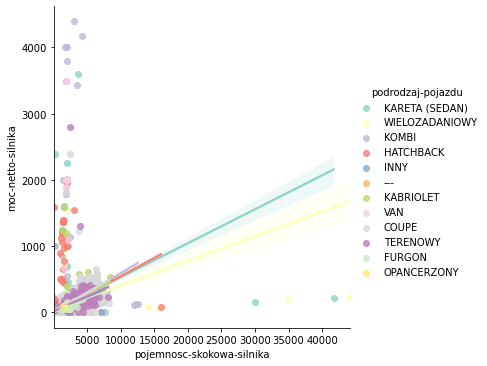

In [29]:
fig

TypeError: 'FacetGrid' object is not callable

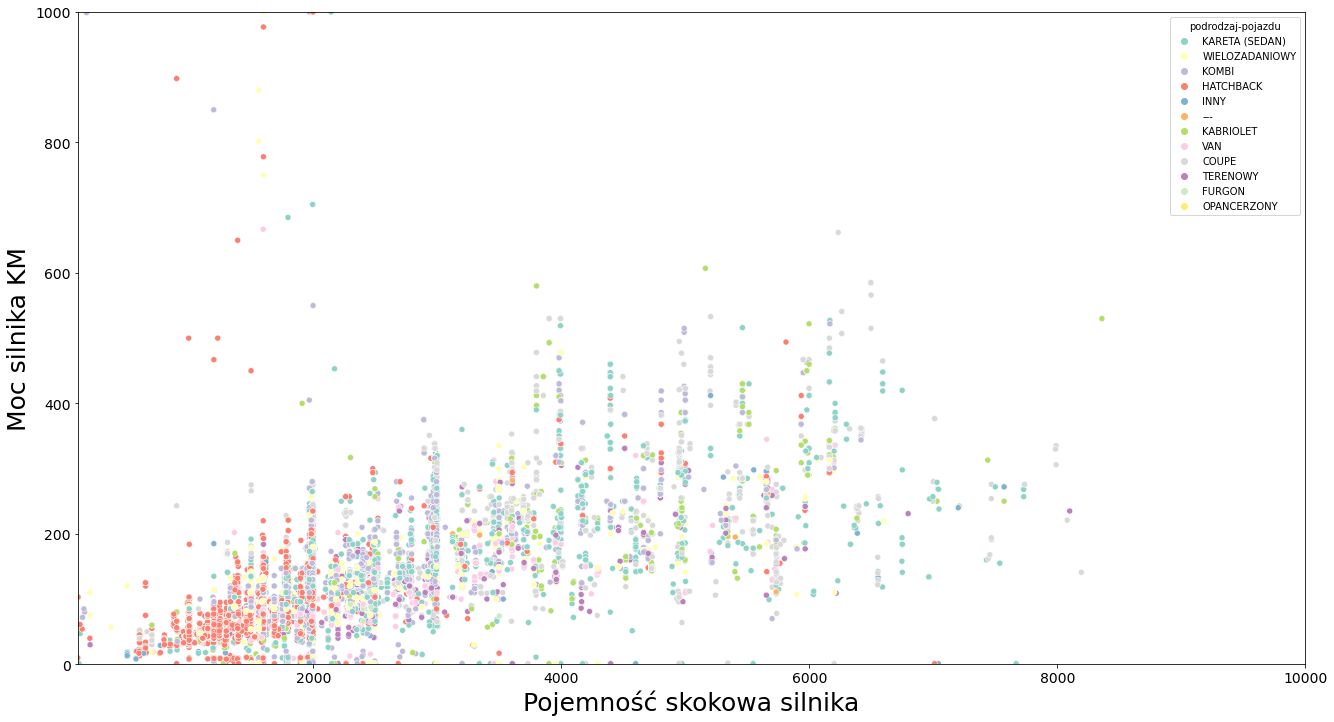

In [31]:
f, ax = plt.subplots(figsize=(22, 12))
fig = sns.scatterplot(data=data, x="pojemnosc-skokowa-silnika", y="moc-netto-silnika", hue='podrodzaj-pojazdu',palette='Set3')
fig.axis(ymin=0, ymax=1000, xmin=100,xmax=10000)
fig.set_xlabel("Pojemność skokowa silnika",fontsize=25)
fig.set_ylabel("Moc silnika KM",fontsize=25)
fig.tick_params(labelsize=14)

In [102]:
data['data-pierwszej-rejestracji-w-kraju'] = pd.to_datetime(data['data-pierwszej-rejestracji-w-kraju'])
dg = data.groupby(pd.Grouper(key='data-pierwszej-rejestracji-w-kraju', freq='1M')).count() 
dg.index = dg.index.strftime('%B %y')
dg = dg['rok-produkcji']

In [103]:
dg

data-pierwszej-rejestracji-w-kraju
January 19      97235
February 19     96769
March 19       108407
April 19        96258
May 19         104133
June 19         92738
Name: rok-produkcji, dtype: int64

In [104]:
dg = pd.DataFrame(dg)

In [105]:
dg = dg.reset_index()

In [106]:
dg.index +=1

In [107]:
dg

,data-pierwszej-rejestracji-w-kraju,rok-produkcji
1,January 19,97235
2,February 19,96769
3,March 19,108407
4,April 19,96258
5,May 19,104133
6,June 19,92738


Text(0.5, 1.0, 'Liczba miesięcznych rejestracji')

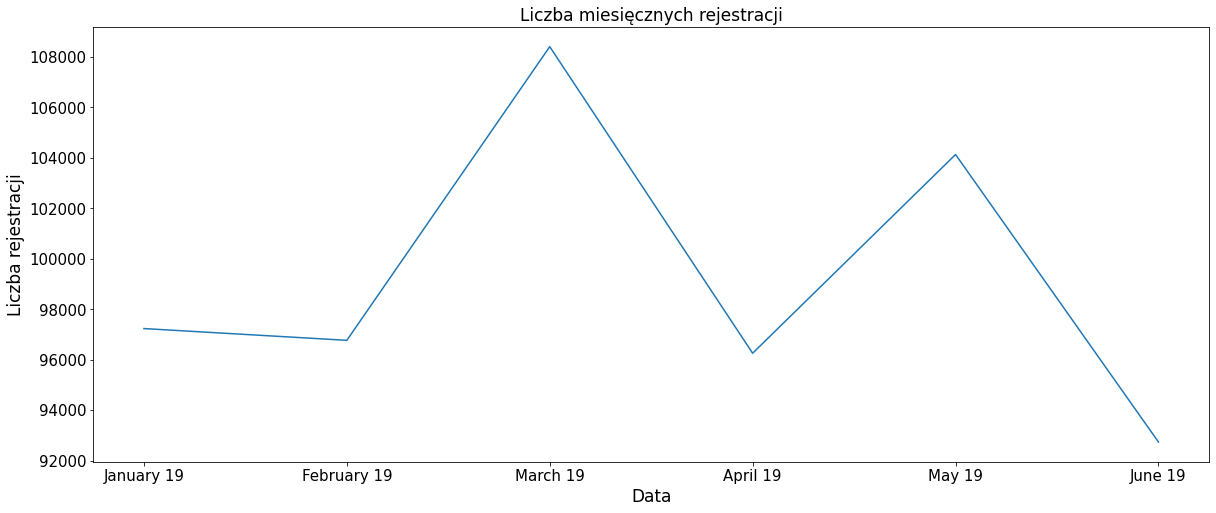

In [120]:
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.lineplot(data=dg,x='data-pierwszej-rejestracji-w-kraju',y='rok-produkcji')
fig.set_xlabel("Data",fontsize=17)
fig.set_ylabel("Liczba rejestracji",fontsize=17)
fig.tick_params(labelsize=15)
fig.set_title("Liczba miesięcznych rejestracji", fontsize=17)
# fig.axis(ymin=0, ymax=1000, xmin=100,xmax=10000);

In [183]:
# dti = pd.date_range("2019-01-02", end='2019-06-28', freq="D")
pd.to_datetime(data['data-pierwszej-rejestracji-w-kraju'], format='%Y-%m-%d', errors='raise')
dates_freq = data['data-pierwszej-rejestracji-w-kraju']
dates_freq = dates_freq.value_counts(sort = False)
dates_freq = dates_freq.sort_index()

In [184]:
dates_freq = pd.DataFrame(dates_freq)
dates_freq = dates_freq.reset_index()
dates_freq.columns = ['data','count_val']

In [185]:
dates = pd.date_range(start='2019-01-01', end='2019-06-30',freq='d')
dates = pd.DataFrame(dates)
dates.columns = ['data']

In [187]:
# mergedDf = dates_freq.merge(dates, left_on='data')
# mergedDf

In [162]:
dates

,data
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
176,2019-06-26
177,2019-06-27
178,2019-06-28
179,2019-06-29


In [170]:
mergedDf

,data,count_val
0,2019-01-01,3
1,2019-01-02,3811
2,2019-01-03,4510
3,2019-01-04,4717
4,2019-01-05,20
...,...,...
154,2019-06-25,4724
155,2019-06-26,4891
156,2019-06-27,5233
157,2019-06-28,5629


In [171]:
df = pd.concat([dates,dates_freq])

In [188]:
df_merged = pd.merge(dates,dates_freq,on='data',how='outer')
df_merged = df_merged.fillna(0)

In [189]:
df_merged

,data,count_val
0,2019-01-01,3.0
1,2019-01-02,3811.0
2,2019-01-03,4510.0
3,2019-01-04,4717.0
4,2019-01-05,20.0
...,...,...
176,2019-06-26,4891.0
177,2019-06-27,5233.0
178,2019-06-28,5629.0
179,2019-06-29,117.0


In [192]:
pd.concat([dates, dates_freq], axis=1)

,data,data,count_val
0,2019-01-01,2019-01-01,3.0
1,2019-01-02,2019-01-02,3811.0
2,2019-01-03,2019-01-03,4510.0
3,2019-01-04,2019-01-04,4717.0
4,2019-01-05,2019-01-05,20.0
...,...,...,...
176,2019-06-26,NaT,NaN
177,2019-06-27,NaT,NaN
178,2019-06-28,NaT,NaN
179,2019-06-29,NaT,NaN


In [182]:
df_merged

,data,count_val
0,2019-01-01,3.0
1,2019-01-02,3811.0
2,2019-01-03,4510.0
3,2019-01-04,4717.0
4,2019-01-05,20.0
...,...,...
176,2019-06-26,4891.0
177,2019-06-27,5233.0
178,2019-06-28,5629.0
179,2019-06-29,117.0


In [176]:
dates

,data
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
176,2019-06-26
177,2019-06-27
178,2019-06-28
179,2019-06-29
